# Carga de librerías


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Carga de datos


In [2]:
archivo = "SI.txt";
df = pd.read_table(archivo, header = None, sep = ",", na_values = "Nothing")
df
#Saltar los renglones
#cd = pd.read_csv(archivo,skiprows = lambda x: x<3, names = columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,140,125,0,0.0,0.000000,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,0
1,188,133,0,0.0,0.000000,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,0
2,105,139,0,0.0,0.000000,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,0
3,34,137,0,0.0,0.000000,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,0
4,39,111,0,0.0,0.000000,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,225,58,0,0.0,0.000000,0.333334,0.421637,0.444444,0.344265,8.333333,5.555555,14.111111,5.333334,-8.333333,17.333334,-9.000000,14.111111,0.622222,-2.068564,6
416,170,154,0,0.0,0.000000,0.111111,0.172133,0.055556,0.136083,0.074074,0.000000,0.222222,0.000000,-0.222222,0.444444,-0.222222,0.222222,0.222222,-2.094395,6
417,238,61,0,0.0,0.000000,0.666667,0.471405,0.722222,0.490653,8.777778,5.888889,14.333333,6.111111,-8.666667,16.666666,-8.000000,14.333333,0.588823,-2.121837,6
418,189,62,0,0.0,0.000000,0.388889,0.250924,0.444444,0.344265,7.629630,5.000000,13.111111,4.777778,-7.888889,16.444445,-8.555555,13.111111,0.635938,-2.066953,6


# División de la matriz del Conjunto de Datos en 2 partes


In [3]:
# la sub-matriz X contiene los datos de las primeras 18 columnas del dataframe y todas las filas
X = df.iloc[:, 0:19].values

# El vector y contiene los valores de las 18 columnas (Grupos de datos)para todas las filas
y = df.iloc[:, 19].values

# Datos en las matrices


In [4]:
print("Conjunto de elementos")
print(X)

print("\nClases")
print(y)

Conjunto de elementos
[[140.         125.           0.         ...   7.7777777    0.5456349
   -1.1218182 ]
 [188.         133.           0.         ...   8.444445     0.53858024
   -0.92481726]
 [105.         139.           0.         ...   7.5555553    0.5326279
   -0.96594584]
 ...
 [238.          61.           0.         ...  14.333333     0.5888227
   -2.1218371 ]
 [189.          62.           0.         ...  13.111111     0.6359381
   -2.0669532 ]
 [242.          57.           0.         ...  20.88889      0.46630767
   -2.3706133 ]]

Clases
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

# Normalización


In [5]:
#Apliqué una transformación de los datos para poder aplicar la distribución normal
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# Cálculo de autovectores y autovalores.

In [6]:
# Calculé la matriz de covarianza
print("NumPy Matriz de covarianza: \n%s"
      %np.cov(X_std.T))

NumPy Matriz de covarianza: 
[[ 1.00238663 -0.00517655  0.         -0.09000882 -0.00527915 -0.07761408
  -0.08324898 -0.10555245 -0.06898446 -0.04813542 -0.05291044 -0.02840126
  -0.06719666 -0.00450509  0.07792637 -0.11326005 -0.04189296 -0.09883005
  -0.12819719]
 [-0.00517655  1.00238663  0.          0.23891706  0.01220751  0.04390118
  -0.05785436  0.08021026 -0.04556318 -0.20818285 -0.20693508 -0.22851966
  -0.18107766  0.18597578 -0.29217723  0.29756008 -0.19260387 -0.0982089
   0.52182882]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [-0.09000882  0.23891706  0.          1.00238663  0.04721002  0.00632074
  -0.02091117  0.01652921 -0.02277823  0.03103135  0.03174881  0.01749016
   0.04665142 -0.0192451  -0.05511378  0.09696486  0.03424307 -0.02753345
   0.19669682]
 [-0.00527915  0.01220751  0.          0.0472100

In [7]:
# Valor propio y Vector Propio de la matriz
covMat = np.cov(X_std.T)

propiVal, propiVec = np.linalg.eig(covMat)

In [8]:
print("Vectores propios \n%s" %propiVec)

print("\nValores propios \n%s" %propiVal)

Vectores propios 
[[-1.50400773e-03  8.18822224e-02  1.86509609e-01  5.87474198e-01
   4.86280456e-01  2.08417501e-01  5.46599353e-01  8.43500430e-02
   1.03777771e-01  6.40966938e-02 -1.03521101e-01 -4.07341826e-02
   1.82988662e-02  1.74644110e-05 -6.41882416e-10  3.33040599e-09
   2.20850876e-09  1.44346353e-09  0.00000000e+00]
 [-1.05147984e-01 -4.99508107e-02 -4.35383517e-01  4.03841947e-01
  -2.87511415e-02  3.57361708e-02 -2.51567012e-01  5.20517946e-01
  -4.85477385e-01 -7.60705598e-02 -1.13826656e-01  2.07097414e-01
  -3.71250333e-03  1.17663412e-02  1.87255135e-09 -8.77639261e-09
   4.08456005e-09  2.60937279e-10  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [-6.11001000e-03 -8.25849576e-03 -3.

In [9]:
#  Hice una lista de parejas (Vector Propio, Valor Propio) 
propiPares = [(np.abs(
                propiVal[i]),
                propiVec[:, i])
                for i in range(len(propiVal)
             )]

propiPares.sort(key = lambda x: x[0], reverse = True)

In [10]:
# Muestro la lista de autovalores en orden Descendente
print("Autovalores en orden descendente: ")
for i in propiPares:
    print(i[0])

Autovalores en orden descendente: 
7.4664454596338246
2.988640996720376
1.918781910553198
1.13303508945293
1.0440995975844052
0.8489187121083646
0.7581758122454765
0.6922079488004307
0.5002248619420574
0.3444461275193996
0.22120116881796997
0.08489262007082404
0.04132538898348199
0.0005637327749220163
3.928112131810498e-15
3.031535052614494e-15
2.0939854128801438e-15
4.5800129839771356e-17
0.0


# Seleccioné los Vectores Propios correspondientes a las componentes principales


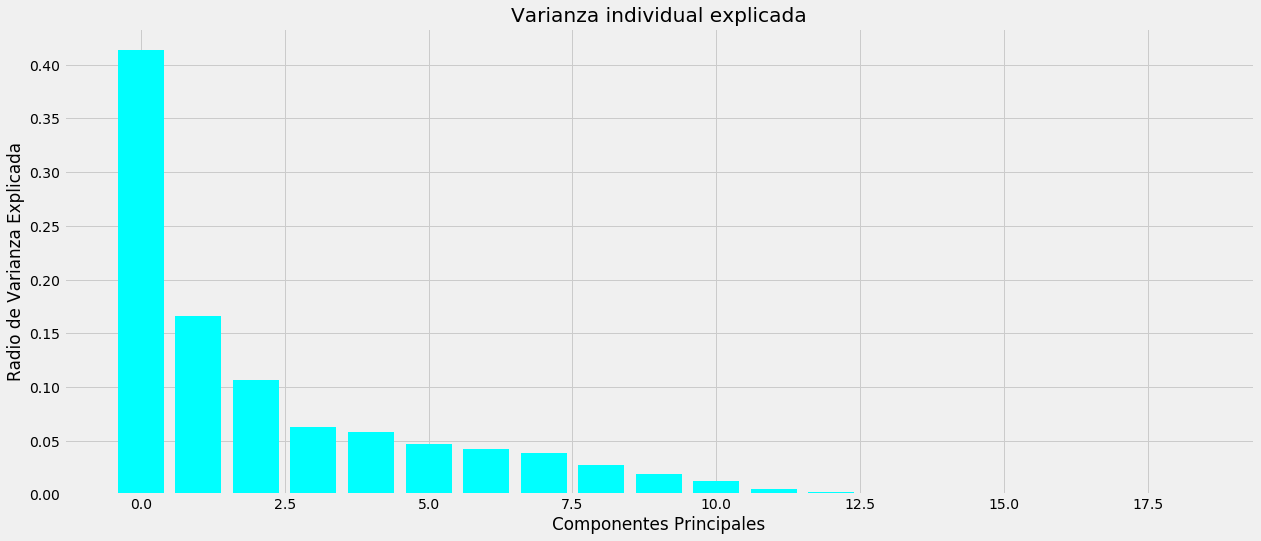

In [11]:
# Valores Propios, calculé la varianza explicada
total = sum(propiVal)
varExp = [(i / total) * 1 for i in sorted(propiVal, reverse = True)]
cumVarExp = np.cumsum(varExp)

# Varianza explicada por cada Valor Propio, y la acumulada
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(19, 8))
    plt.xlabel("Componentes Principales")
    plt.ylabel("Radio de Varianza Explicada")
    plt.title("Varianza individual explicada")
    plt.bar(range(19), varExp, align = "center", color = "cyan", ecolor = "black")


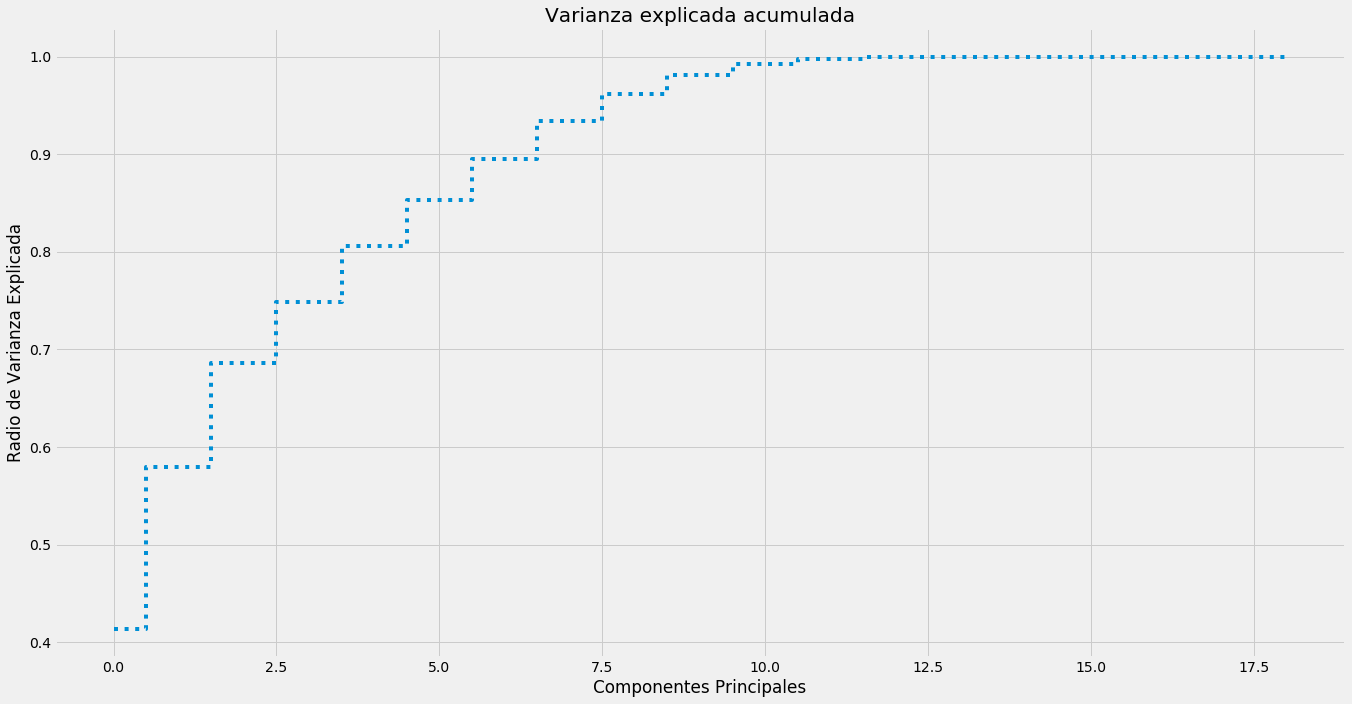

In [12]:
# Varianza explicada por cada Valor Propio, y la acumulada
total = sum(propiVal)
varExp = [(i / total) * 1 for i in sorted(propiVal, reverse = True)]
cum_var_exp = np.cumsum(varExp)

# Varianza explicada por cada autovalor, y la acumulada
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize = (19, 10))
    #plt.show()
    
    plt.step(range(19), cum_var_exp, where = "mid", linestyle = ":")
    plt.ylabel("Radio de Varianza Explicada")
    plt.xlabel("Componentes Principales")
    plt.title("Varianza explicada acumulada")
    plt.tight_layout()

# Datos Puros.


In [18]:
#Generé la matríz a partir de los pares Vector Propio y un Vector Propio
matriz_PCA = np.hstack((propiPares[0][1].reshape(19,1),
                        propiPares[1][1].reshape(19,1)
                       ))

print('Matriz PCA:\n', matriz_PCA)

Y = X_std.dot(matriz_PCA)

Matriz PCA:
 [[-0.00150401  0.08188222]
 [-0.10514798 -0.04995081]
 [ 0.          0.        ]
 [-0.00611001 -0.0082585 ]
 [ 0.05906742 -0.20819103]
 [ 0.0881603  -0.42993484]
 [ 0.04988767 -0.51205055]
 [ 0.09405115 -0.46245681]
 [ 0.0510466  -0.51275395]
 [ 0.35293314  0.06064941]
 [ 0.35036397  0.06567582]
 [ 0.36020553  0.05804977]
 [ 0.34115531  0.05803328]
 [-0.31954311 -0.0036118 ]
 [ 0.33336524  0.03436954]
 [-0.25881376 -0.04873216]
 [ 0.35559297  0.05641281]
 [-0.14639085 -0.04200018]
 [-0.20530437 -0.01791653]]


# Datos sobre un espacio de dimensionalidad 2.

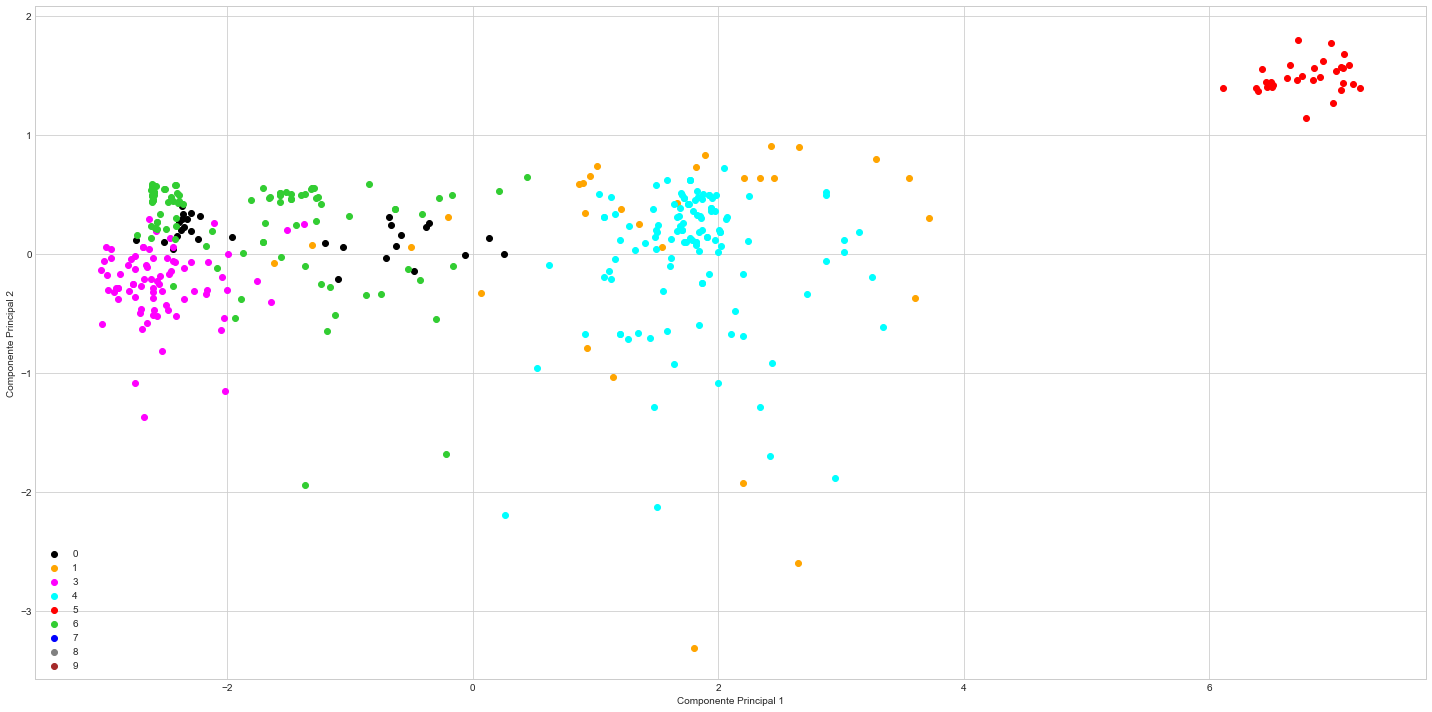

In [19]:
with plt.style.context("seaborn-whitegrid"):
    plt.figure(figsize=(20,10))
    for eti, colu in zip((0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
                        ("black", "orange", "magenta", "cyan", "red", "limegreen", "blue", "gray", "brown", "pink")):
        plt.scatter(Y[y == eti, 0],
                    Y[y == eti, 1],
                    c = colu,
                    label = eti)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.legend(loc = "lower left")
    plt.tight_layout()
    plt.show()

# Datos Escalados

In [15]:
#Generé la matríz a partir de los pares Vector Propio y un Vector Propio
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 


matriz_PCA = np.hstack((propiPares[0][1].reshape(19,1),
                        propiPares[1][1].reshape(19,1)
                       ))

Y = X_std.dot(scaler.fit_transform(matriz_PCA))
print(Y)

[[-5.57151935e+00 -3.43599194e+00]
 [-5.20257883e+00 -2.46331787e+00]
 [-5.76186576e+00 -3.67245259e+00]
 [-6.15459358e+00 -4.34120212e+00]
 [-6.11196994e+00 -4.96630379e+00]
 [-6.40959233e+00 -5.01296518e+00]
 [-1.96169810e+00 -1.79727013e+00]
 [-3.76510584e+00 -4.29447102e+00]
 [-4.21764171e+00 -4.32145893e+00]
 [-2.88613102e+00 -3.09183892e+00]
 [-6.64590348e+00 -4.58561667e+00]
 [-2.45025968e+00 -4.33141958e+00]
 [-5.07383170e+00 -2.42206900e+00]
 [-2.62340011e+00 -2.96183625e+00]
 [-3.46048724e+00 -5.30527258e+00]
 [-5.55384413e+00 -3.42923546e+00]
 [-5.54794085e+00 -3.23310373e+00]
 [-4.02837509e+00 -4.43953257e+00]
 [-5.48602714e+00 -3.51574935e+00]
 [-4.88547944e+00 -2.17108620e+00]
 [-6.45994876e+00 -5.11799326e+00]
 [-9.78757028e-01 -2.49593707e+00]
 [-5.89094798e+00 -5.25963643e+00]
 [-3.07931394e+00 -3.28874570e+00]
 [-2.30620916e+00 -2.83372240e+00]
 [-1.90917406e+00 -2.10541825e+00]
 [-6.23333567e+00 -4.76857385e+00]
 [-5.29906706e+00 -3.19447540e+00]
 [-2.42595319e+00 -2

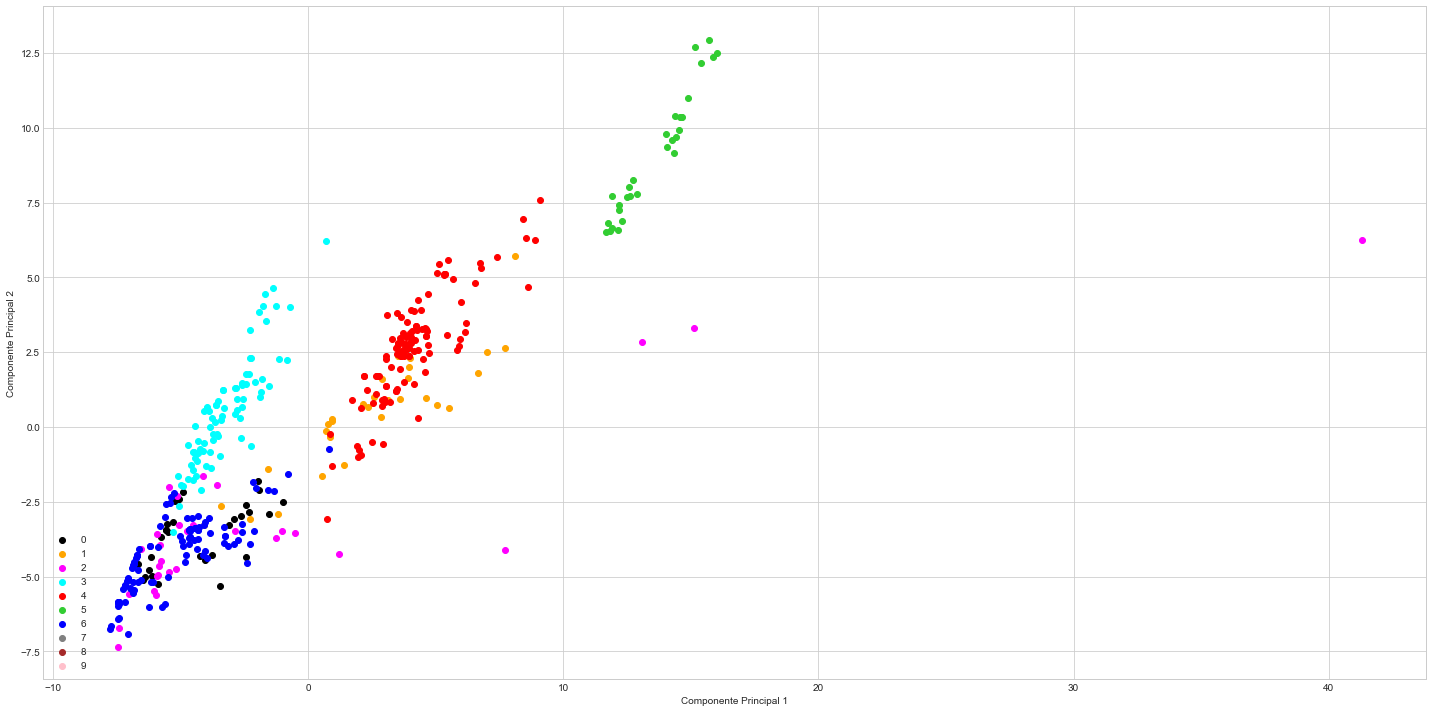

In [16]:
with plt.style.context("seaborn-whitegrid"):
    plt.figure(figsize=(20,10))
    for eti, colu in zip((0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
                        ("black", "orange", "magenta", "cyan", "red", "limegreen", "blue", "gray", "brown", "pink")):
        plt.scatter(Y[y == eti, 0],
                    Y[y == eti, 1],
                    c = colu,
                    label = eti)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.legend(loc = "lower left")
    plt.tight_layout()
    plt.show()

In [20]:
y = [0,1, 2, 3, 4,5, 6]

In [21]:
print("\nClases: ")
print (y)


Clases: 
[0, 1, 2, 3, 4, 5, 6]
